In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("sample_data/BSE_ACC.csv")

In [3]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2022-01-19,2278.85,2278.85,2220.80,2232.65,2235.777072,11497,2099,25704729.0,3960.0,34.44,58.05,-46.20
1,2022-01-18,2385.00,2390.00,2241.75,2255.25,2299.603563,15884,2398,36526903.0,6778.0,42.67,148.25,-129.75
2,2022-01-17,2360.00,2389.00,2301.50,2377.45,2341.967819,18085,2999,42354488.0,5612.0,31.03,87.50,17.45
3,2022-01-14,2306.00,2372.90,2306.00,2359.85,2352.955271,16656,2241,39190823.0,3206.0,19.25,66.90,53.85
4,2022-01-13,2306.75,2325.00,2298.20,2311.55,2308.251075,9535,1257,22009174.0,3415.0,35.82,26.80,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2014-01-07,1089.00,1094.00,1073.00,1083.90,1085.165545,9067,747,9839196.0,2576.0,28.41,21.00,-5.10
1987,2014-01-06,1094.00,1094.65,1072.10,1083.90,1086.165502,9444,708,10257747.0,3962.0,41.95,22.55,-10.10
1988,2014-01-03,1090.00,1100.00,1082.00,1088.65,1087.119097,13384,1381,14550002.0,5409.0,40.41,18.00,-1.35
1989,2014-01-02,1116.60,1122.00,1094.00,1098.00,1109.061490,14978,1245,16611523.0,3785.0,25.27,28.00,-18.60


In [6]:
# df.set_index("Date")

Text(0, 0.5, 'Price')

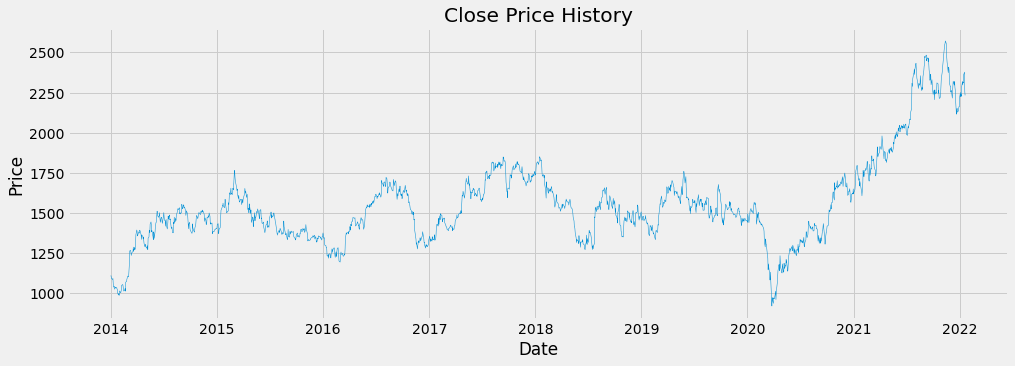

In [7]:
plt.figure(figsize =(15,5))
plt.plot(df["Date"],df["Close Price"],label="Close",linewidth=0.5)
# plt.xticks()
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Price")


###calculating the MACD and Signal line
###calculating short term exponantial moving average (EMA)

In [8]:
shortEMA = df["Close Price"].ewm(span=12,adjust= False).mean()

longEMA = df["Close Price"].ewm(span=26,adjust= False).mean()

MACD = shortEMA - longEMA

signal = MACD.ewm(span=9,adjust= False).mean()

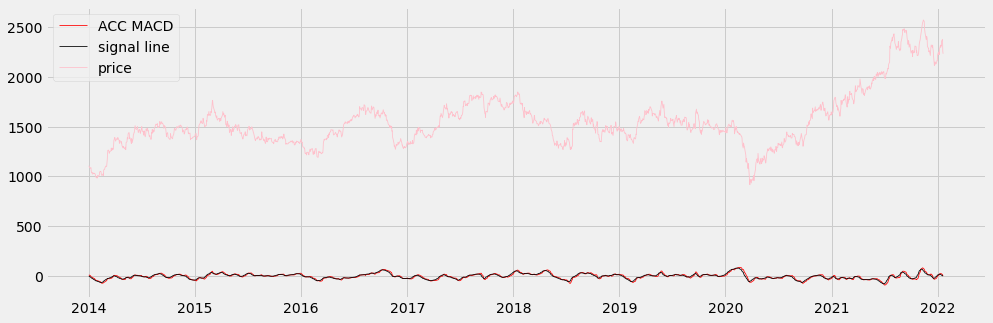

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df["Date"],MACD,label= "ACC MACD",color="red",linewidth=0.8)
plt.plot(df["Date"],signal,label="signal line",color="black",linewidth=0.8)
plt.plot(df["Date"],df["Close Price"],label= "price",color="pink",linewidth=0.8)
plt.legend(loc='upper left')

In [10]:
df['MACD']= MACD
df["signal"] = signal

In [11]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,MACD,signal
0,2022-01-19,2278.85,2278.85,2220.80,2232.65,2235.777072,11497,2099,25704729.0,3960.0,34.44,58.05,-46.20,0.000000,0.000000
1,2022-01-18,2385.00,2390.00,2241.75,2255.25,2299.603563,15884,2398,36526903.0,6778.0,42.67,148.25,-129.75,1.802849,0.360570
2,2022-01-17,2360.00,2389.00,2301.50,2377.45,2341.967819,18085,2999,42354488.0,5612.0,31.03,87.50,17.45,12.942940,2.877044
3,2022-01-14,2306.00,2372.90,2306.00,2359.85,2352.955271,16656,2241,39190823.0,3206.0,19.25,66.90,53.85,20.119446,6.325524
4,2022-01-13,2306.75,2325.00,2298.20,2311.55,2308.251075,9535,1257,22009174.0,3415.0,35.82,26.80,4.80,21.659791,9.392378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2014-01-07,1089.00,1094.00,1073.00,1083.90,1085.165545,9067,747,9839196.0,2576.0,28.41,21.00,-5.10,-0.277254,-13.251304
1987,2014-01-06,1094.00,1094.65,1072.10,1083.90,1086.165502,9444,708,10257747.0,3962.0,41.95,22.55,-10.10,2.736470,-10.053749
1988,2014-01-03,1090.00,1100.00,1082.00,1088.65,1087.119097,13384,1381,14550002.0,5409.0,40.41,18.00,-1.35,5.445382,-6.953923
1989,2014-01-02,1116.60,1122.00,1094.00,1098.00,1109.061490,14978,1245,16611523.0,3785.0,25.27,28.00,-18.60,8.251563,-3.912826


In [12]:
def buy_sell(signal):
    buy = list()
    sell = list()
    flag = -1

    for i in range(0,len(signal)):
        if signal["MACD"][i]>signal["signal"][i]:
            sell.append(np.nan)
            if flag != 1 :
                buy.append(signal["Close Price"][i])
                flag =1
            else:
                buy.append(np.nan)
        elif signal["MACD"][i]<signal["signal"][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal["Close Price"][i])
                flag =0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
                
    return (buy,sell)

In [13]:
a = buy_sell(df)
df["Buy_Signal_Price"] = a[0]
df["Sell_Signal_Price"] = a[1]

In [14]:
df.set_index("Date")

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,MACD,signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,,,,,
2022-01-19,2278.85,2278.85,2220.80,2232.65,2235.777072,11497,2099,25704729.0,3960.0,34.44,58.05,-46.20,0.000000,0.000000,NaN,NaN
2022-01-18,2385.00,2390.00,2241.75,2255.25,2299.603563,15884,2398,36526903.0,6778.0,42.67,148.25,-129.75,1.802849,0.360570,2255.25,NaN
2022-01-17,2360.00,2389.00,2301.50,2377.45,2341.967819,18085,2999,42354488.0,5612.0,31.03,87.50,17.45,12.942940,2.877044,NaN,NaN
2022-01-14,2306.00,2372.90,2306.00,2359.85,2352.955271,16656,2241,39190823.0,3206.0,19.25,66.90,53.85,20.119446,6.325524,NaN,NaN
2022-01-13,2306.75,2325.00,2298.20,2311.55,2308.251075,9535,1257,22009174.0,3415.0,35.82,26.80,4.80,21.659791,9.392378,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-07,1089.00,1094.00,1073.00,1083.90,1085.165545,9067,747,9839196.0,2576.0,28.41,21.00,-5.10,-0.277254,-13.251304,NaN,NaN
2014-01-06,1094.00,1094.65,1072.10,1083.90,1086.165502,9444,708,10257747.0,3962.0,41.95,22.55,-10.10,2.736470,-10.053749,NaN,NaN
2014-01-03,1090.00,1100.00,1082.00,1088.65,1087.119097,13384,1381,14550002.0,5409.0,40.41,18.00,-1.35,5.445382,-6.953923,NaN,NaN


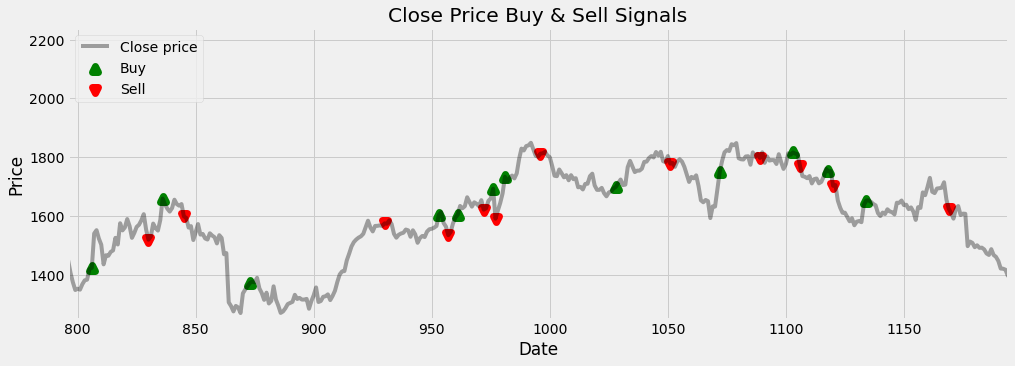

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(df.index,df["Buy_Signal_Price"],color="green",label="Buy",marker="^",alpha=1,linewidth=7)
plt.scatter(df.index,df["Sell_Signal_Price"],color="red",label="Sell",marker="v",alpha=1,linewidth=7)
plt.plot(df["Close Price"],label="Close price",alpha= 0.35,color="black")
plt.title("Close Price Buy & Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.margins(x=-.4, y=-0.2) 
plt.show()

TypeError: 'Int64Index' object is not callable

In [30]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,MACD,signal,Buy_Signal_Price,Sell_Signal_Price
0,2022-01-19,2278.85,2278.85,2220.80,2232.65,2235.777072,11497,2099,25704729.0,3960.0,34.44,58.05,-46.20,0.000000,0.000000,NaN,NaN
1,2022-01-18,2385.00,2390.00,2241.75,2255.25,2299.603563,15884,2398,36526903.0,6778.0,42.67,148.25,-129.75,1.802849,0.360570,2255.25,NaN
2,2022-01-17,2360.00,2389.00,2301.50,2377.45,2341.967819,18085,2999,42354488.0,5612.0,31.03,87.50,17.45,12.942940,2.877044,NaN,NaN
3,2022-01-14,2306.00,2372.90,2306.00,2359.85,2352.955271,16656,2241,39190823.0,3206.0,19.25,66.90,53.85,20.119446,6.325524,NaN,NaN
4,2022-01-13,2306.75,2325.00,2298.20,2311.55,2308.251075,9535,1257,22009174.0,3415.0,35.82,26.80,4.80,21.659791,9.392378,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2014-01-07,1089.00,1094.00,1073.00,1083.90,1085.165545,9067,747,9839196.0,2576.0,28.41,21.00,-5.10,-0.277254,-13.251304,NaN,NaN
1987,2014-01-06,1094.00,1094.65,1072.10,1083.90,1086.165502,9444,708,10257747.0,3962.0,41.95,22.55,-10.10,2.736470,-10.053749,NaN,NaN
1988,2014-01-03,1090.00,1100.00,1082.00,1088.65,1087.119097,13384,1381,14550002.0,5409.0,40.41,18.00,-1.35,5.445382,-6.953923,NaN,NaN
1989,2014-01-02,1116.60,1122.00,1094.00,1098.00,1109.061490,14978,1245,16611523.0,3785.0,25.27,28.00,-18.60,8.251563,-3.912826,NaN,NaN


In [33]:
filt=[]
for i in range(len(df.index)):
   filt.append((df.loc[i]["Buy_Signal_Price"] == df.loc[i]["Close Price"])|(df.loc[i]["Sell_Signal_Price"] == df.loc[i]["Close Price"]))

In [40]:
df[fil].head(1).index[0]

1

In [41]:
last_price = df.loc[df[fil].head(1).index]["Buy_Signal_Price"]
last_price

1    2255.25
Name: Buy_Signal_Price, dtype: float64

In [26]:
df.loc[filt]

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,MACD,signal,Buy_Signal_Price,Sell_Signal_Price
0,2022-01-19,2278.85,2278.85,2220.80,2232.65,2235.777072,11497,2099,25704729.0,3960.0,34.44,58.05,-46.20,0.000000,0.000000,NaN,NaN
1,2022-01-18,2385.00,2390.00,2241.75,2255.25,2299.603563,15884,2398,36526903.0,6778.0,42.67,148.25,-129.75,1.802849,0.360570,2255.25,NaN
2,2022-01-17,2360.00,2389.00,2301.50,2377.45,2341.967819,18085,2999,42354488.0,5612.0,31.03,87.50,17.45,12.942940,2.877044,NaN,NaN
3,2022-01-14,2306.00,2372.90,2306.00,2359.85,2352.955271,16656,2241,39190823.0,3206.0,19.25,66.90,53.85,20.119446,6.325524,NaN,NaN
4,2022-01-13,2306.75,2325.00,2298.20,2311.55,2308.251075,9535,1257,22009174.0,3415.0,35.82,26.80,4.80,21.659791,9.392378,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2014-01-07,1089.00,1094.00,1073.00,1083.90,1085.165545,9067,747,9839196.0,2576.0,28.41,21.00,-5.10,-0.277254,-13.251304,NaN,NaN
1987,2014-01-06,1094.00,1094.65,1072.10,1083.90,1086.165502,9444,708,10257747.0,3962.0,41.95,22.55,-10.10,2.736470,-10.053749,NaN,NaN
1988,2014-01-03,1090.00,1100.00,1082.00,1088.65,1087.119097,13384,1381,14550002.0,5409.0,40.41,18.00,-1.35,5.445382,-6.953923,NaN,NaN
1989,2014-01-02,1116.60,1122.00,1094.00,1098.00,1109.061490,14978,1245,16611523.0,3785.0,25.27,28.00,-18.60,8.251563,-3.912826,NaN,NaN


In [18]:
buy_sell_df = df.loc[filt]
buy_sell_df.to_csv("buy_sell_df.csv",index = False)

In [19]:
df[df["Buy_Signal_Price"] == df["Close Price"]]

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,MACD,signal,Buy_Signal_Price,Sell_Signal_Price
1,2022-01-18,2385.00,2390.00,2241.75,2255.25,2299.603563,15884,2398,36526903.0,6778.0,42.67,148.25,-129.75,1.802849,0.360570,2255.25,NaN
24,2021-12-16,2312.00,2312.00,2263.30,2266.75,2274.418652,4407,664,10023363.0,1015.0,23.03,48.70,-45.25,-18.271514,-23.217887,2266.75,NaN
74,2021-10-04,2231.00,2283.00,2231.00,2264.05,2264.124697,15285,1873,34607146.0,4015.0,26.27,52.00,33.05,-28.551151,-29.419860,2264.05,NaN
114,2021-08-05,2402.95,2412.60,2376.00,2388.10,2399.904255,101311,2657,243136700.0,39842.0,39.33,36.60,-14.85,-9.436089,-14.858341,2388.10,NaN
141,2021-06-28,2030.20,2059.05,2024.80,2051.10,2047.940312,10002,947,20483499.0,1567.0,15.67,34.25,20.90,-76.480037,-79.627308,2051.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,2014-07-10,1440.00,1485.00,1412.00,1457.80,1453.692838,38325,3532,55712778.0,4441.0,11.59,73.00,17.80,-8.397098,-9.486901,1457.80,NaN
1863,2014-07-07,1451.95,1465.60,1444.55,1450.35,1453.243502,17544,1785,25495704.0,4739.0,27.01,21.05,-1.60,-7.760362,-9.025090,1450.35,NaN
1897,2014-05-20,1460.00,1460.00,1417.00,1424.70,1428.143428,23029,1482,32888715.0,5068.0,22.01,43.00,-35.30,-20.217426,-21.030248,1424.70,NaN
1914,2014-04-23,1336.00,1358.40,1319.70,1347.75,1329.800845,206447,2660,274533395.0,185593.0,89.90,38.70,11.75,-28.181859,-31.703107,1347.75,NaN


In [16]:
test_1.capital =10000
test_1.margin = .05
test_1.stoplos_per = 0
test_1.dataframe = df

NameError: name 'test_1' is not defined

In [24]:
test_1.te()

KeyError: 'Buy_Signal_Price'

In [20]:
'Buy_Signal_Price' == 'Buy_Signal_Price'

True

In [25]:
df.to


,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,MACD,signal,Buy_Signal_Price,Sell_Signal_Price
0,2022-01-19,2278.85,2278.85,2220.80,2232.65,2235.777072,11497,2099,25704729.0,3960.0,34.44,58.05,-46.20,0.000000,0.000000,NaN,NaN
1,2022-01-18,2385.00,2390.00,2241.75,2255.25,2299.603563,15884,2398,36526903.0,6778.0,42.67,148.25,-129.75,1.802849,0.360570,2255.25,NaN
2,2022-01-17,2360.00,2389.00,2301.50,2377.45,2341.967819,18085,2999,42354488.0,5612.0,31.03,87.50,17.45,12.942940,2.877044,NaN,NaN
3,2022-01-14,2306.00,2372.90,2306.00,2359.85,2352.955271,16656,2241,39190823.0,3206.0,19.25,66.90,53.85,20.119446,6.325524,NaN,NaN
4,2022-01-13,2306.75,2325.00,2298.20,2311.55,2308.251075,9535,1257,22009174.0,3415.0,35.82,26.80,4.80,21.659791,9.392378,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2014-01-07,1089.00,1094.00,1073.00,1083.90,1085.165545,9067,747,9839196.0,2576.0,28.41,21.00,-5.10,-0.277254,-13.251304,NaN,NaN
1987,2014-01-06,1094.00,1094.65,1072.10,1083.90,1086.165502,9444,708,10257747.0,3962.0,41.95,22.55,-10.10,2.736470,-10.053749,NaN,NaN
1988,2014-01-03,1090.00,1100.00,1082.00,1088.65,1087.119097,13384,1381,14550002.0,5409.0,40.41,18.00,-1.35,5.445382,-6.953923,NaN,NaN
1989,2014-01-02,1116.60,1122.00,1094.00,1098.00,1109.061490,14978,1245,16611523.0,3785.0,25.27,28.00,-18.60,8.251563,-3.912826,NaN,NaN


In [20]:
ddtest_1 = algotrading_tester.Test()

NameError: name 'algotrading_tester' is not defined